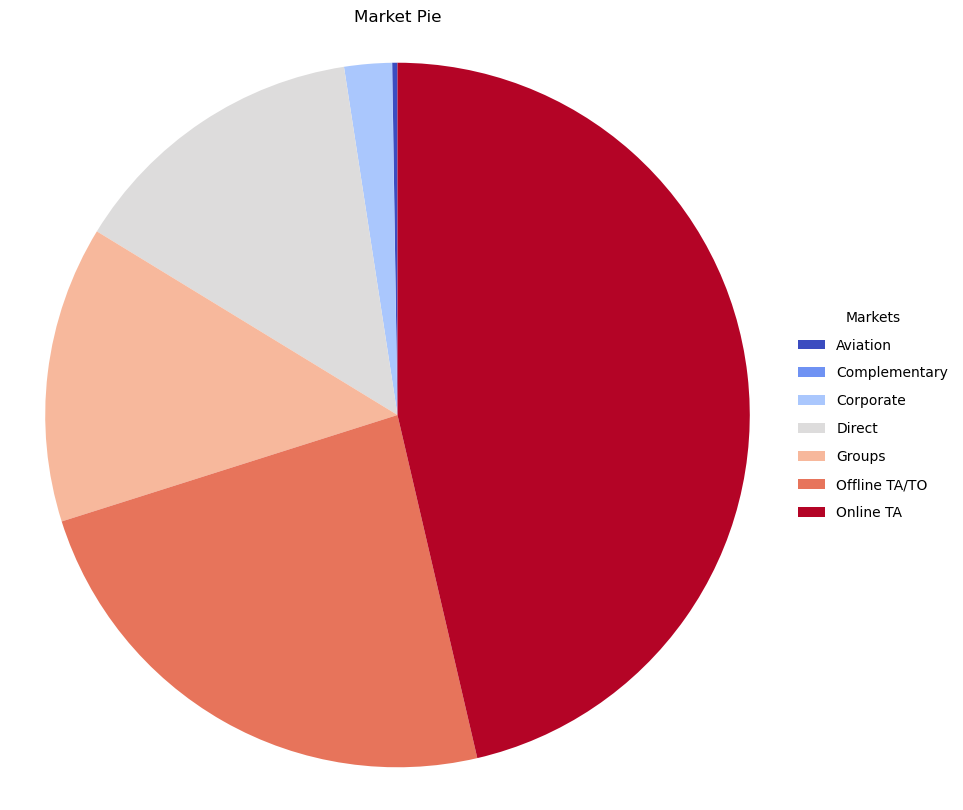

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("reservationsN.csv")

df['Totalincome'] = df['DailyAVG'] * (df['weekendnights'] + df['weeknights'])

filtered_df = df[(df['stat'] == 'Check-Out') | (df['deposit'] == 'Non Refund')]

market_income = filtered_df.groupby('market')['Totalincome'].sum()

# מספר סגמנטים
num_segments = len(market_income)

# יצירת רשימת צבעים דינמית מפלטה
colors = plt.get_cmap('coolwarm')(np.linspace(0, 1, num_segments))

fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts = ax.pie(
    market_income,
    labels=None, 
    startangle=90,
    colors=colors
)

# הוספת תוויות בצד עם צבעים תואמים לפרוסות
plt.legend(
    wedges,
    market_income.index,
    title="Markets",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    labelspacing=1,
    fontsize=10,
    frameon=False
)

plt.title("Market Pie")
plt.axis('equal')
plt.show()
